<a href="https://colab.research.google.com/github/astrovishalthakur/MachineLearning/blob/main/FeatureEngineering/HandlingMissingData/KNN_Imputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression


In [2]:
url = "https://raw.githubusercontent.com/astrovishalthakur/100-days-of-machine-learning/main/day39-knn-imputer/train.csv"

In [3]:
df = pd.read_csv(url, usecols=["Age", "Pclass", "Survived", "Fare"])

In [4]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [5]:
df.shape

(891, 4)

In [6]:
df.isnull().mean()*100

Survived     0.00000
Pclass       0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [7]:
X = df.drop(columns=["Survived"])
y = df.Survived

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [9]:
X_train.shape

(712, 3)

In [10]:
X_test.shape

(179, 3)

In [26]:
# knn = KNNImputer() 

knn = KNNImputer(n_neighbors=3,weights='distance') # by default weights = "uniform"

X_train_trf = knn.fit_transform(X_train)
X_test_trf = knn.transform(X_test)

In [27]:
pd.DataFrame(X_train_trf, columns=X_train.columns)

,Pclass,Age,Fare
0,1.0,40.000000,27.7208
1,3.0,4.000000,16.7000
2,3.0,47.000000,9.0000
3,3.0,9.000000,31.3875
4,3.0,20.000000,9.8458
...,...,...,...
707,3.0,30.000000,8.6625
708,3.0,26.151292,8.7125
709,1.0,71.000000,49.5042
710,1.0,32.666667,221.7792


In [28]:
lr = LogisticRegression()
lr.fit(X_train_trf, y_train)
y_pred = lr.predict(X_test_trf)
accuracy_score(y_test, y_pred)

0.7150837988826816

In [33]:
# Comparision with Simple Imputer --> mean

si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

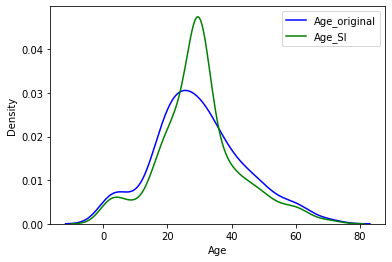

In [30]:
sns.kdeplot(X_train.Age, color="blue", label="Age_original")
sns.kdeplot(X_train_trf2[:,1], color="green", label="Age_SI")
plt.legend()
plt.show()

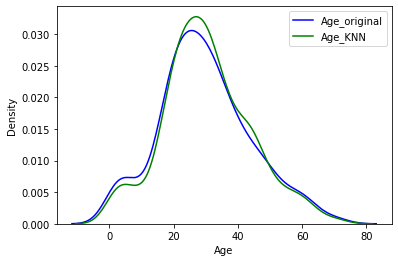

In [31]:
sns.kdeplot(X_train.Age, color="blue", label="Age_original")
sns.kdeplot(X_train_trf[:,1], color="green", label="Age_KNN")
plt.legend()
plt.show()

# As we can compare above that distribution is much better maintained with KNN imputer

In [32]:
lr = LogisticRegression()

lr.fit(X_train_trf2,y_train)

y_pred2 = lr.predict(X_test_trf2)

accuracy_score(y_test,y_pred2)

0.6927374301675978